<a href="https://colab.research.google.com/github/Kostiantyn-Liapkalo/tensorflow_keras/blob/Main/hw_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

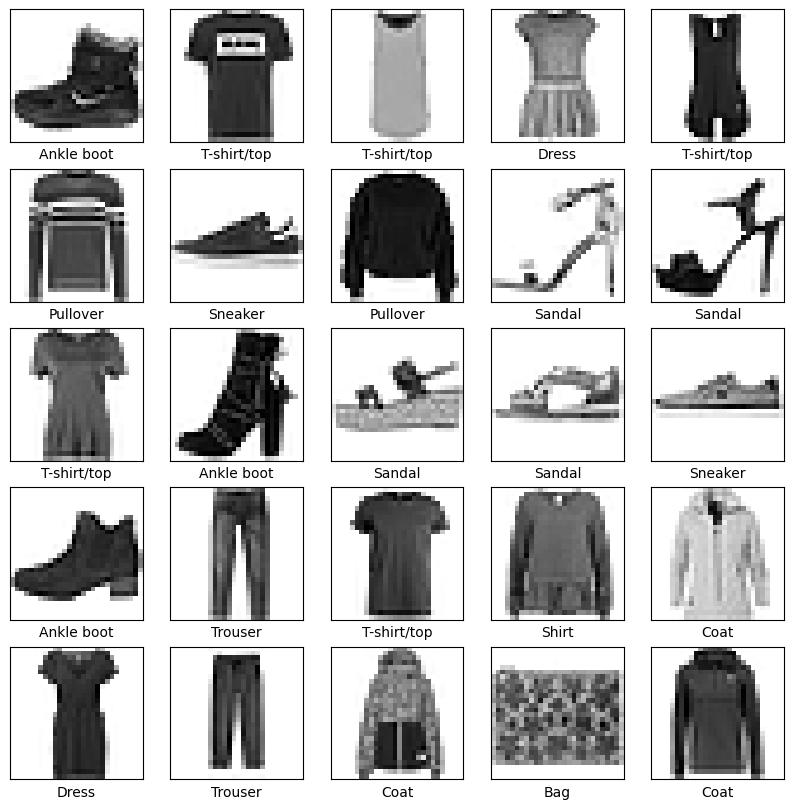

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [5]:
num_classes = 10
num_features = 28 * 28 * 1
learning_rate = 0.001
batch_size = 256
epochs = 120


x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
x_train, x_test = x_train / 255., x_test / 255.

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)


model = Sequential([
    Flatten(input_shape=(num_features,)),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)

model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

steps_per_epoch = len(x_train) // batch_size

callbacks = [lr_scheduler, early_stopping]

history = model.fit(train_data,
                    epochs=epochs,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks
                    )

train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTrain accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"Difference accuracy: {(train_acc - test_acc)*100:.2f}%")

Epoch 1/120
234/234 [==============================] - 25s 94ms/step - loss: 0.7485 - accuracy: 0.7189 - val_loss: 0.4745 - val_accuracy: 0.8296 - lr: 0.0010
Epoch 2/120
234/234 [==============================] - 30s 127ms/step - loss: 0.4807 - accuracy: 0.8274 - val_loss: 0.4170 - val_accuracy: 0.8492 - lr: 0.0010
Epoch 3/120
234/234 [==============================] - 25s 109ms/step - loss: 0.4470 - accuracy: 0.8391 - val_loss: 0.3963 - val_accuracy: 0.8584 - lr: 0.0010
Epoch 4/120
234/234 [==============================] - 20s 86ms/step - loss: 0.4247 - accuracy: 0.8459 - val_loss: 0.4072 - val_accuracy: 0.8509 - lr: 0.0010
Epoch 5/120
234/234 [==============================] - 22s 93ms/step - loss: 0.4014 - accuracy: 0.8561 - val_loss: 0.3744 - val_accuracy: 0.8664 - lr: 0.0010
Epoch 6/120
234/234 [==============================] - 20s 85ms/step - loss: 0.3903 - accuracy: 0.8585 - val_loss: 0.3669 - val_accuracy: 0.8675 - lr: 0.0010
Epoch 7/120
234/234 [=============================

In [7]:
from sklearn.metrics import classification_report

# Отримання прогнозованих міток для тестового набору
predicted_probabilities = model.predict(x_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Звіт про класифікацію
report = classification_report(y_test, predicted_labels, target_names=class_names)
print(report)

313/313 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.87      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.82      0.84      0.83      1000
       Dress       0.89      0.92      0.90      1000
        Coat       0.83      0.83      0.83      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.75      0.70      0.73      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



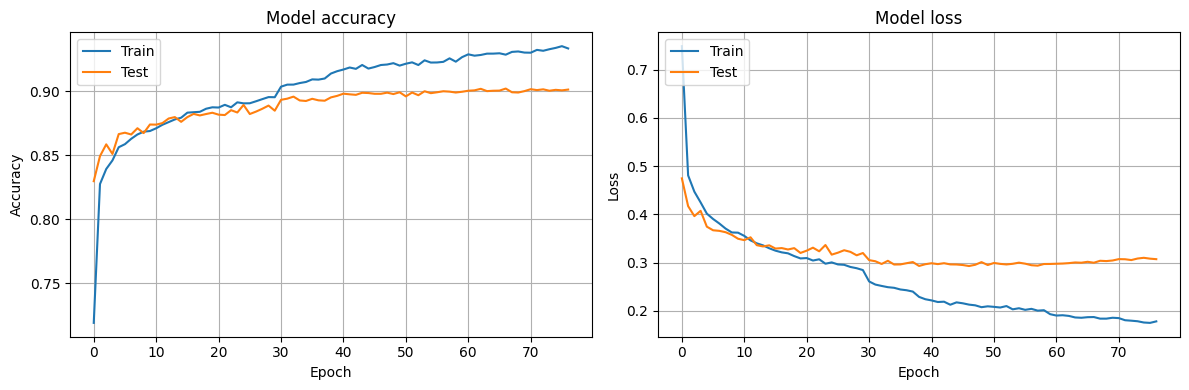

In [8]:
# Імпортуйте бібліотеку для візуалізації даних
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()